# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [55]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [23]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [9]:
#  1. Get the total rides for each city type (step 1)
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [11]:
# 2. Get the total drivers for each city type (step 2)
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
#  3. Get the total amount of fares for each city type (step 3)
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [21]:
# calculate the average fare per ride for each city type (step 4)
average_ride_fare = total_fares_by_type/total_rides_by_type
average_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [22]:
# Calculate the average fare per driver for each city type (step 5)
average_fare_per_driver = total_fares_by_type/total_drivers_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [35]:
# Create a dataframe with the city type as the index carrying the total rides, total drivers, total fares, average fare per
# ride & per driver for each city type, then remove the word (type) from the index column (steps 6 & 7)
pyber_summary_df = pd.DataFrame(
    {"Total Rides": total_rides_by_type, 
     "Total Drivers": total_drivers_by_type, 
     "Total Fares": total_fares_by_type, 
     "Average Fare per Ride": average_ride_fare, 
     "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [37]:
# Adjust the formatting of the summary dataframe (Deliverable 1 - Step 8)

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [42]:
# Group the dataframe by type & date as indices & the values are the sum of fares for that day
# (ref https://stackoverflow.com/questions/19798229/how-to-do-group-by-on-a-multiindex-in-pandas) - Step 9

pyber_by_city = pyber_data_df.groupby(by=["type", "date"]).sum()["fare"]
pyber_by_city.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [44]:
# Use the reset function to allow for using the pivot function on the dataframe - Step 10

pyber_by_city = pyber_by_city.reset_index()
pyber_by_city.head()

,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,43.69
1,1,Rural,2019-01-02 11:18:32,52.12
2,2,Rural,2019-01-03 19:51:01,19.90
3,3,Rural,2019-01-04 03:31:26,24.88
4,4,Rural,2019-01-06 07:38:40,47.33


In [56]:
# Change the date column data type to datetime - Step 13

pyber_by_city["date"] = pd.to_datetime(pyber_by_city["date"])

In [57]:
# Confirm the data types in the data frame

pyber_by_city.dtypes

index             int64
type             object
date     datetime64[ns]
fare            float64
dtype: object

In [58]:
# use the pivot function to re-arrange the data with date as the index & city types as columns - Step 11

pivoted_pyber_df = pyber_by_city.pivot(index='date', columns='type', values='fare')
pivoted_pyber_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [71]:
# Create a new dataframe with using the loc method where the date range is 2019-01-01 through 2019-04-29 - Step 12

dated_df = pyber_by_city.loc[(pyber_by_city["date"]>= '2019-01-01') & (pyber_by_city["date"]<= '2019-04-29')]
dated_df["fare"].count()

2196

In [73]:
# Use the pivot function to re-arrange the new dataframe  with date as the index & city types as columns - Step 12

pivoted_dated_pyber_df = dated_df.pivot(index='date', columns='type', values='fare')
pivoted_dated_pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [68]:
# Confirm the data types pf the new dataframe using the info() function - Step 14

pivoted_dated_pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [120]:
# Use the resample() function to create weekly bins for the new dataframe (index is the last day of the week & 
# values are the sum of fares for this week) - Step 15

pivoted_dated_pyber_w_df = pivoted_dated_pyber_df.resample('W').sum()
pivoted_dated_pyber_w_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


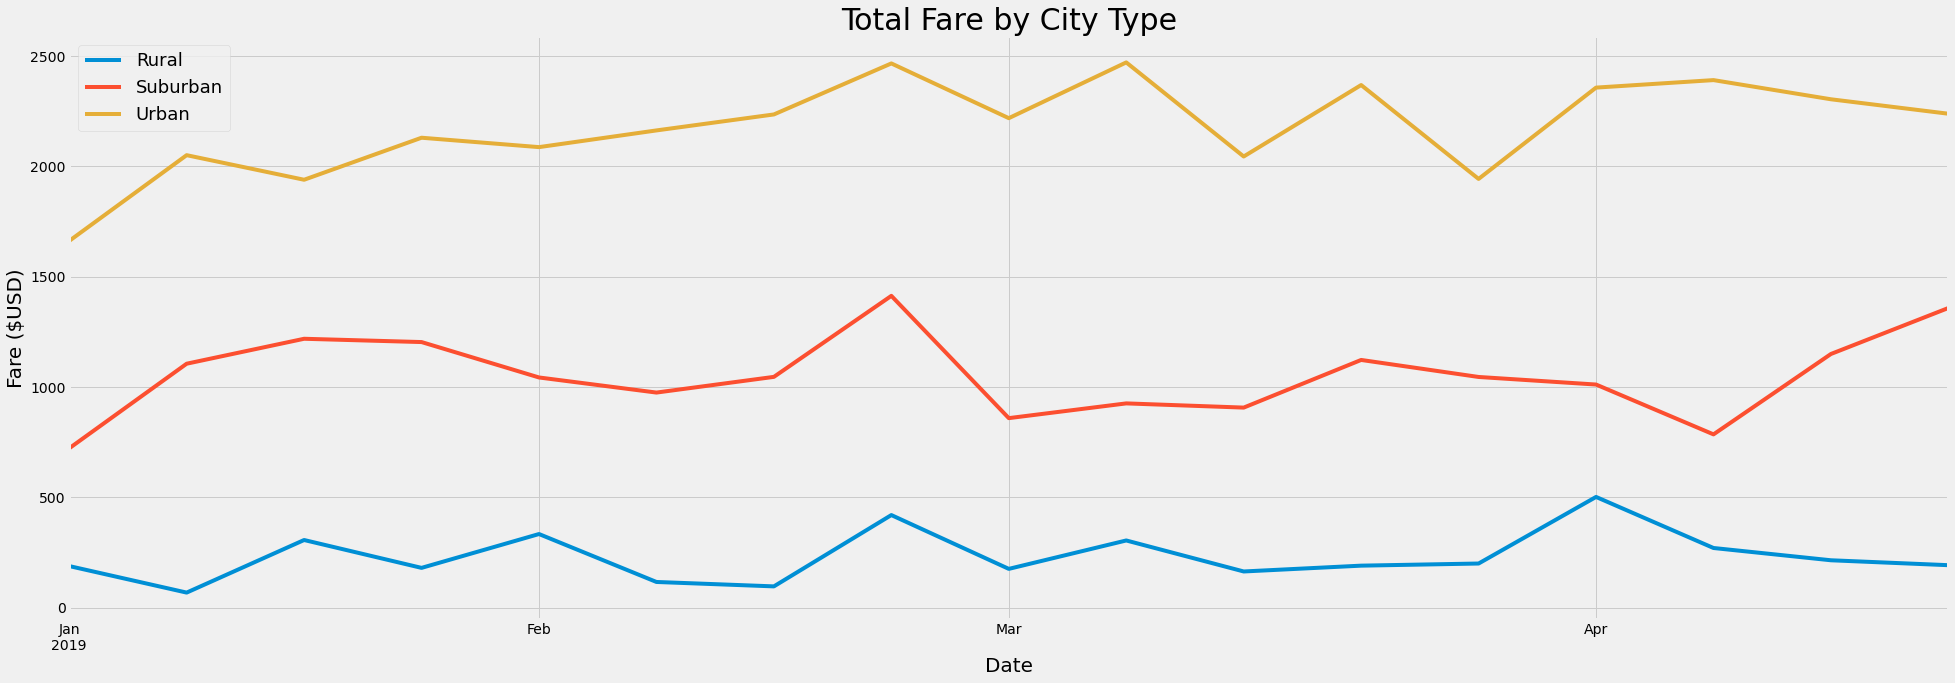

In [159]:
# Create a line chart to show the resampled dataframe using the object interface method - Step 16

pivoted_resampled_fig = pivoted_dated_pyber_w_df.plot(figsize=(30, 10), label = ("City Type"))

# Annotate & Format the output chart
pivoted_resampled_fig.set_title("Total Fare by City Type", fontsize=30)
pivoted_resampled_fig.set_xlabel("Date", fontsize=20)
pivoted_resampled_fig.set_ylabel("Fare ($USD)", fontsize=20)
pivoted_resampled_fig.legend(fontsize=18)

#Import the reqired style from matplotlib & use it
from matplotlib import style
style.use('fivethirtyeight')

#Save the output figure to the analysis folder & show the figure
plt.savefig("Analysis/Total Fare by city type.png")
plt.show()